This course will make use of notebook style coding.  Notebooks are incredibly useful tools both for teaching and for disseminating data anlysis.

This is a set of codes to revisist penalized regression, statistical testing, and false discovery rates.

## Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

This section provides some initialization commands, which can simply be copied for assignments.

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# We need to import key libraries that we're going to use.  
# For now this is just numpy, which is our linear algebra library
import numpy as np

Setting the random seed for code reproducibility.

In [2]:
# to make this notebook's output stable across runs, we are going to see the random seed
np.random.seed(42)

Note that we have to reset the random seed _every_ time we run an algorithm if we want the same results!

We also want to set up a plotting environment and make it look pretty.  For those of you familiar with matlab, we will be using matplotlib which is fairly close in syntax and feel.  It's not too far off from R either.

In [3]:
# To plot pretty figures
import matplotlib.pyplot as plt
%matplotlib inline 
# This command figures show up in the notebook.  It's a "magic" command...
# Typically, this now happens by default so it is often an unnecessary command, but is good for standardization.
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

These commands will help us save figures; not going to go through them so much.

In [4]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_SAVE_DIR = "18"

In [5]:
# makes the directory if it doesn't exist.
import os
if not (os.path.isdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)):
    print('Figure directory didn\'t exist, creating now.')
    os.mkdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)
else:
    print('Figure directory exists.') 

Figure directory didn't exist, creating now.


In [6]:
# a simple defined helper function.
def savepdf(fig,name):
    fig.savefig(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR+'/'+name+'.pdf',transparent=True)

## Revisiting penalized regression

Visualizing true weights

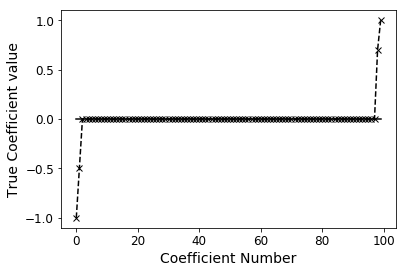

In [7]:
beta_true=np.ones([100])*0
beta_true[12]=1.0
beta_true[22]=-.5
beta_true[42]=-1
beta_true[67]=.7
beta_true=np.sort(beta_true)
fig=plt.figure(figsize=[6,4])
plt.plot([0,99],[0,0],'k-',0)
plt.plot(beta_true,'kx--')
plt.xlabel('Coefficient Number')
plt.ylabel('True Coefficient value')
plt.yticks([-1,-.5,0,.5,1])
savepdf(fig,'1beta')

Generating synthetic data

In [8]:
N=150
p=100
X=np.random.randint(low=-1,high=2,size=[N,p])
y=np.dot(X,beta_true)+1*np.random.randn(N)

Comparing ridge and lasso

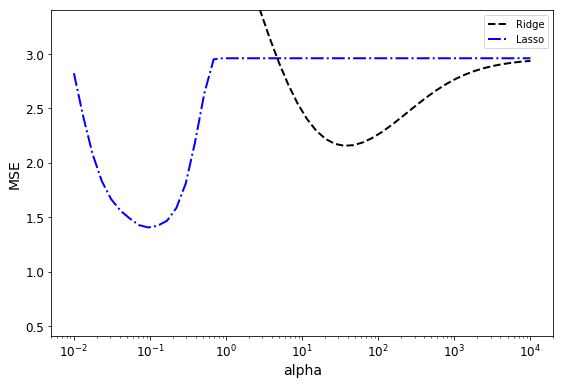

In [9]:
from sklearn import model_selection, linear_model
n_folds =5
kfoldcv=model_selection.KFold(n_splits=n_folds,shuffle=True,random_state=24)
ridge=linear_model.Ridge() 
lasso=linear_model.Lasso()
n_alphas=50
alphas = np.logspace(-2, 4, n_alphas)
param_grid={'alpha':alphas}
gscv_ridge=model_selection.GridSearchCV(ridge,param_grid,scoring='neg_mean_squared_error',cv=kfoldcv,iid=False,return_train_score=False)
gscv_ridge.fit(X,y)
gscv_lasso=model_selection.GridSearchCV(lasso,param_grid,scoring='neg_mean_squared_error',cv=kfoldcv,iid=False,return_train_score=False)
gscv_lasso.fit(X,y)
fig=plt.figure(figsize=[9,6])
rcv=-gscv_ridge.cv_results_['mean_test_score']
lcv=-gscv_lasso.cv_results_['mean_test_score']
plt.plot(alphas,rcv,'k--',lw=2,label='Ridge')
plt.plot(alphas,lcv,'b-.',lw=2,label='Lasso')
plt.xscale('log')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')
ymin=np.min(np.concatenate([rcv,lcv],axis=0))
plt.ylim([ymin-1,ymin+2])
plt.show()
savepdf(fig,'1MSE')

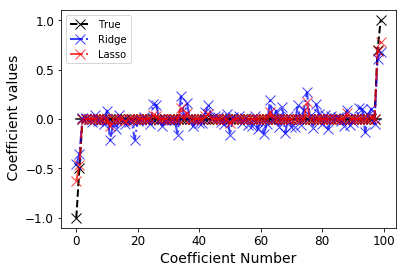

In [10]:
fig=plt.figure(figsize=[6,4])
plt.plot([0,99],[0,0],'k-',0)
plt.plot(beta_true,'kx--',lw=2,ms=10,label='True')
plt.plot(gscv_ridge.best_estimator_.coef_,'bx-.',lw=2,ms=10,alpha=.75,label='Ridge')
plt.plot(gscv_lasso.best_estimator_.coef_,'rx-.',lw=2,ms=10,alpha=.75,label='Lasso')
plt.xlabel('Coefficient Number')
plt.ylabel(' Coefficient values')
plt.yticks([-1,-.5,0,.5,1])
plt.legend()
savepdf(fig,'inferred_beta_1')

2nd problem

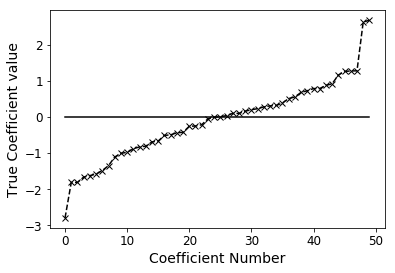

In [11]:
beta_true=np.random.randn(50)
beta_true=np.sort(beta_true)
figure=plt.figure(figsize=[6,4])
plt.plot([0,49],[0,0],'k-',0)
plt.plot(beta_true,'kx--')
plt.xlabel('Coefficient Number')
plt.ylabel('True Coefficient value')
savepdf(figure,'2beta')

In [12]:
N=150
p=50
X=np.random.randint(low=-1,high=2,size=[N,p])
y=np.dot(X,beta_true)+5*np.random.randn(N)

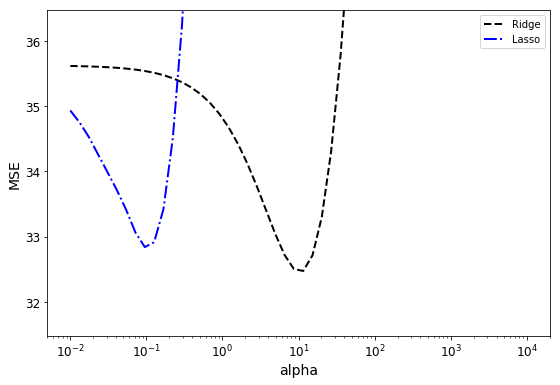

In [13]:
from sklearn import model_selection, linear_model
n_folds =5
kfoldcv=model_selection.KFold(n_splits=n_folds,shuffle=True,random_state=24)
ridge=linear_model.Ridge() 
lasso=linear_model.Lasso()
n_alphas=50
alphas = np.logspace(-2, 4, n_alphas)
param_grid={'alpha':alphas}
gscv_ridge=model_selection.GridSearchCV(ridge,param_grid,scoring='neg_mean_squared_error',cv=kfoldcv,iid=False,return_train_score=False)
gscv_ridge.fit(X,y)
gscv_lasso=model_selection.GridSearchCV(lasso,param_grid,scoring='neg_mean_squared_error',cv=kfoldcv,iid=False,return_train_score=False)
gscv_lasso.fit(X,y)
fig=plt.figure(figsize=[9,6])
rcv=-gscv_ridge.cv_results_['mean_test_score']
lcv=-gscv_lasso.cv_results_['mean_test_score']
plt.plot(alphas,rcv,'k--',lw=2,label='Ridge')
plt.plot(alphas,lcv,'b-.',lw=2,label='Lasso')
plt.xscale('log')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')
ymin=np.min(np.concatenate([rcv,lcv],axis=0))
plt.ylim([ymin-1,ymin+4])
plt.show()
savepdf(fig,'2MSE')

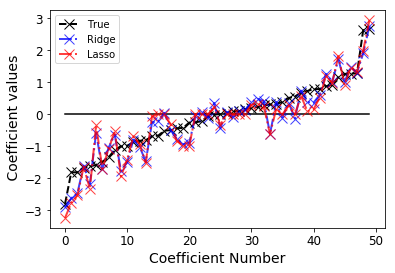

In [14]:
fig=plt.figure(figsize=[6,4])
plt.plot([0,49],[0,0],'k-',0)
plt.plot(beta_true,'kx--',lw=2,ms=10,label='True')
plt.plot(gscv_ridge.best_estimator_.coef_,'bx-.',lw=2,ms=10,alpha=.75,label='Ridge')
plt.plot(gscv_lasso.best_estimator_.coef_,'rx-.',lw=2,ms=10,alpha=.75,label='Lasso')
plt.xlabel('Coefficient Number')
plt.ylabel(' Coefficient values')
plt.yticks([-3,-2,-1,0,1,2,3])
plt.legend()
savepdf(fig,'inferred_beta_2')

3rd problem

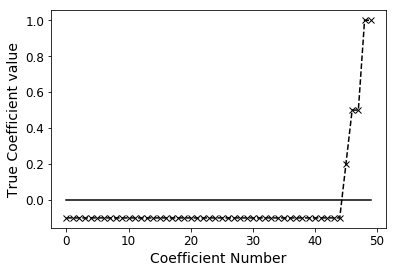

In [15]:
beta_true=np.ones([50])-1.1
beta_true[[12,45]]=1
beta_true[[17,25]]=.5
beta_true[[35]]=.2
beta_true=np.sort(beta_true)
figure=plt.figure(figsize=[6,4])
plt.plot([0,49],[0,0],'k-',0)
plt.plot(beta_true,'kx--')
plt.xlabel('Coefficient Number')
plt.ylabel('True Coefficient value')
savepdf(figure,'3beta')

In [16]:
N=75
p=50
X=np.random.randint(-1,2,size=[N,p])
y=np.dot(X,beta_true)+1*np.random.randn(N)

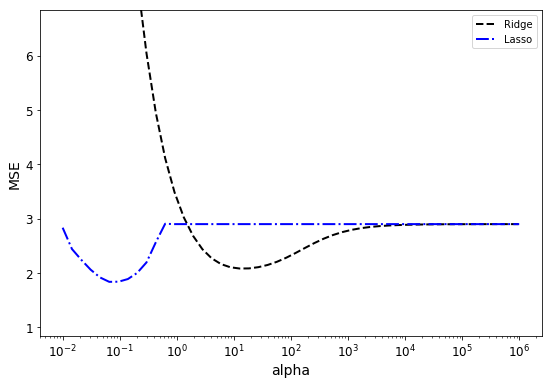

In [17]:
from sklearn import model_selection, linear_model
n_folds =3
kfoldcv=model_selection.KFold(n_splits=n_folds,shuffle=True,random_state=24)
ridge=linear_model.Ridge(fit_intercept=False) 
lasso=linear_model.Lasso(fit_intercept=False)
n_alphas=50
alphas = np.logspace(-2, 6, n_alphas)
param_grid={'alpha':alphas}
gscv_ridge=model_selection.GridSearchCV(ridge,param_grid,scoring='neg_mean_squared_error',cv=kfoldcv,iid=False,return_train_score=False)
gscv_ridge.fit(X,y)
gscv_lasso=model_selection.GridSearchCV(lasso,param_grid,scoring='neg_mean_squared_error',cv=kfoldcv,iid=False,return_train_score=False)
gscv_lasso.fit(X,y)
fig=plt.figure(figsize=[9,6])
rcv=-gscv_ridge.cv_results_['mean_test_score']
lcv=-gscv_lasso.cv_results_['mean_test_score']
plt.plot(alphas,rcv,'k--',lw=2,label='Ridge')
plt.plot(alphas,lcv,'b-.',lw=2,label='Lasso')
plt.xscale('log')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')
ymin=np.min(np.concatenate([rcv,lcv],axis=0))
plt.ylim([ymin-1,ymin+5])
plt.show()
savepdf(fig,'3MSE')

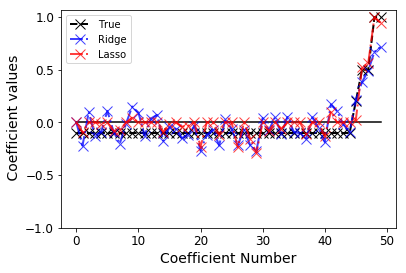

In [18]:
fig=plt.figure(figsize=[6,4])
plt.plot([0,49],[0,0],'k-',0)
plt.plot(beta_true,'kx--',lw=2,ms=10,label='True')
plt.plot(gscv_ridge.best_estimator_.coef_,'bx-.',lw=2,ms=10,alpha=.75,label='Ridge')
plt.plot(gscv_lasso.best_estimator_.coef_,'rx-.',lw=2,ms=10,alpha=.75,label='Lasso')
plt.xlabel('Coefficient Number')
plt.ylabel(' Coefficient values')
plt.yticks([-1,-.5,0,.5,1])
plt.legend()
savepdf(fig,'inferred_beta_3')

## Permutation Testing

In [19]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# limiting data size to emphasize the point
X=cancer.data[:100,:]
y=cancer.target[:100]

In [23]:
print(y.shape)

(100,)


First, let's evaluated the performance using a standard method and pipeline.

In [24]:
from sklearn import ensemble,model_selection,svm,decomposition,pipeline
cv=model_selection.KFold(n_splits=5,shuffle=True,random_state=42)
pca=decomposition.PCA()
clf=svm.SVC(kernel='rbf')
pipe=pipeline.Pipeline([('pca',pca),('clf',clf)])
param_grid={'pca__n_components':np.arange(1,10),'clf__C':np.logspace(-2,0,10),'clf__gamma':np.logspace(-2,0,10)}
gs=model_selection.GridSearchCV(pipe,param_grid,scoring='roc_auc',cv=cv)

In [25]:
gs.fit(X,y)
print('The top AUC is ',gs.best_score_)

The top AUC is  0.8954545454545455


This is a good value, which is great.  But how much of this information is actually used in predictions and how much is just because we tried a lot of things?

Below we are going to completely randomize only $y$ (our labels), meaning that there is __no__ relationship between the features and the outcomes because we have synthetically destroyed it.

In [22]:
y_random=np.random.permutation(y)
gs.fit(X,y_random)
print('The top AUC is ',gs.best_score_)

The top AUC is  0.5865842490842492


Note that this estimate is _above_ .5, so this estimates we are doing better than random chance.  In fact, this is pretty high.

#### What is happening?
Largely we're struggling with multiple comparisons.  Let's run some simulations to see what's happening.  We'll do this by using a decision tree to have an idea of what would happen if there is no relationship between our features and the outcomes.

In [26]:
from sklearn import tree
cv=model_selection.KFold(n_splits=5,shuffle=True,random_state=42)
clf=tree.DecisionTreeClassifier()
param_grid={'min_samples_split':[2,5],'max_depth':[1,2,3],'min_samples_leaf':[1,3,5]}
gs=model_selection.GridSearchCV(clf,param_grid,scoring='roc_auc',cv=cv)

In [27]:
gs.fit(X,y)
print('The top AUC is ',gs.best_score_)
predicted_score=gs.best_score_

The top AUC is  0.8670856410746117


We want to compare this to our null hypothesis.

__Null Hypothesis:__  There is no relationship between the features and the labels.

We can create a distribution of what type of AUC our procedure would give _if the null hyptothesis was true._

We will do this by running the cross-validation grid-search procedure repeatedly on different randomizations of permuted labels, showing what the distribution of AUC would be _under the null hypothesis_.

In [28]:
perm_fits=[]
#from tqdm import trange
for repeat in range(0,100):
    gs.fit(X,np.random.permutation(y))
    perm_fits.append(gs.best_score_)

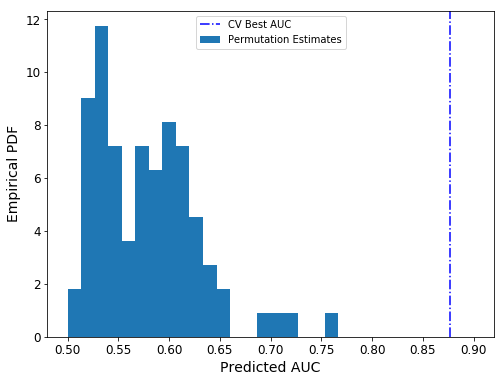

In [26]:
fig=plt.figure(figsize=[8,6])
plt.hist(perm_fits,bins=np.linspace(.5,.9,num=31),density=1,label='Permutation Estimates')
plt.axvline(predicted_score,linestyle='-.',color='b',label='CV Best AUC')
plt.legend()
plt.xlabel('Predicted AUC')
plt.ylabel('Empirical PDF')
savepdf(fig,'permutation_test')

This permutation test gives a _p_-value of 0.  Note that it shouldn't be exactly 0, but weren't limited by the number of repeates that we run.

## Nested Cross-Validation Estimation

Note that permutation tests are great at calculating p-values, but leave bias in the predicted AUC.  Nested-CV can attempt to address this bias.

In [27]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# Randomize the order
N=len(cancer.target)
perm=np.random.permutation(N)
n_used=100
# limiting data size to emphasize the point
X=cancer.data[perm,:]
y=cancer.target[perm]
X_holdout=cancer.data[n_used:,:]
y_holdout=cancer.target[n_used:]
X=X[:n_used,:]
y=y[:n_used]

In [28]:
from sklearn import tree
cv=model_selection.KFold(n_splits=5,shuffle=True,random_state=189)
clf=tree.DecisionTreeClassifier()
param_grid={'min_samples_split':[2,5],'max_depth':[1,2,3],'min_samples_leaf':[1,3,5]}
gs=model_selection.GridSearchCV(clf,param_grid,scoring='roc_auc',cv=cv)

Without a nested structure:

In [29]:
gs.fit(X,y)
print('The top AUC is ',gs.best_score_)
predicted_score=gs.best_score_

The top AUC is  0.9519090909090909


Now we are going to "nest" the procedure, which means we run the grid-search procedure over and over to rotate a test set as well as our validation set.

In [30]:
from sklearn import metrics
outer_cv=model_selection.KFold(n_splits=5,shuffle=True,random_state=24)
aucs=[]
for train_index, test_index in outer_cv.split(X,y):
    # Create a temporary test set
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Run grid_search_cv on our training data from this split
    gs.fit(X_train,y_train)
    # Evaluate and store the best model on this portion of the test data
    aucs.append(metrics.roc_auc_score(y_test,gs.predict_proba(X_test)[:,1]))
print('The AUC estimates from the different splits are',aucs)
print('The mean estimate from Nested CV is {}'.format(np.mean(aucs)))


The AUC estimates from the different splits are [0.9895833333333333, 0.96875, 1.0, 0.9166666666666667, 0.8535353535353536]
The mean estimate from Nested CV is 0.9457070707070707


Let's evaluate on the real withheld test set.

In [31]:
gs.fit(X,y)
holdout_auc=metrics.roc_auc_score(y_holdout,gs.predict_proba(X_holdout)[:,1])
print(holdout_auc)

0.947944395149364


## Bonferroni and False Discovery Rates

There are lots of real examples of this in the real world, but can be practical to use synthetic data to get a feel for the system.

Let's create synthetic data from a standard linear system:
$$y=x^Tb+\epsilon$$
Then we will test each variable independently to determine a p-value.

In [32]:
p=10000
N=400
num_real_relationships=30
X=np.random.rand(N,p)
# First 30 entries have a real relationship
b=np.zeros(p)
b[:num_real_relationships]=1
#
y=np.dot(X,b)+.5*np.random.randn(N)

Let's determine p-values on a variable by variable basis.  Because this is regression, we can do this on by using standard Pearson Correlation, which just uses correlation to create a p-value.

In [33]:
from scipy import stats

In [34]:
pvals=np.zeros(p)
for i in range(0,p):
    cor,pval=stats.pearsonr(X[:,i],y)
    pvals[i]=pval

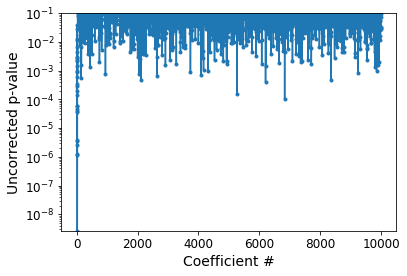

In [35]:
fig=plt.figure(figsize=[6,4])
plt.plot(pvals,'.-')
plt.xlabel('Coefficient #')
plt.ylabel('Uncorrected p-value')
plt.yscale('log')
plt.ylim([np.min(pvals),.1])
plt.show()

What happens if we naively test these values for significance?

In [36]:
alpha=.05
significant=pvals<alpha
print('We captured {} of {} real relationships'.format(np.sum(significant[:num_real_relationships]),num_real_relationships))
print('We reported {} false positives'.format(np.sum(significant[num_real_relationships:])))
#print('The following features are significant',np.where(significant)[0])

We captured 30 of 30 real relationships
We reported 554 false positives


This is particularly bad, which is an issue of multiple comparisons.

Using a Bonferroni Correction.

In [37]:
alpha=.05
bonferroni_pvals=pvals*p
significant=bonferroni_pvals<alpha
print('We captured {} of {} real relationships'.format(np.sum(significant[:num_real_relationships]),num_real_relationships))
print('We reported {} false positives'.format(np.sum(significant[num_real_relationships:])))
#print('The following features are significant',np.where(significant))

We captured 6 of 30 real relationships
We reported 0 false positives


Using a Benjamini-Hochberg FDR correction

In [38]:
alpha=.05
pval_order=np.argsort(pvals)
ordered_pvals=pvals[pval_order]
adj_significant_level=(1+np.arange(0,p))/p*alpha
pass_threshold=np.where(ordered_pvals<adj_significant_level)[0]
if len(pass_threshold)>0:
    num_significant=np.max(np.where(ordered_pvals<adj_significant_level))+1
else:
    num_significant=0
significant=pvals<0
significant[pval_order[:num_significant]]=True
print('We captured {} of {} real relationships'.format(np.sum(significant[:num_real_relationships]),num_real_relationships))
print('We reported {} false positives'.format(np.sum(significant[num_real_relationships:])))

We captured 6 of 30 real relationships
We reported 0 false positives


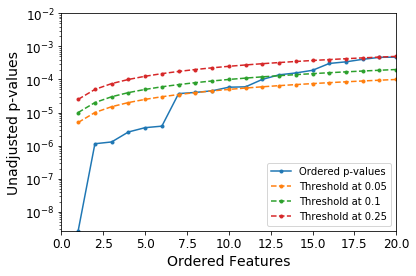

In [39]:
fig=plt.figure(figsize=[6,4])
alphas=[.05,.1,.25]
plt.plot(1+np.arange(0,p),ordered_pvals,'.-',label='Ordered p-values')
plt.plot(1+np.arange(0,p),(1+np.arange(0,p))/p*alphas[0],'.--',label='Threshold at {}'.format(alphas[0]))
plt.plot(1+np.arange(0,p),(1+np.arange(0,p))/p*alphas[1],'.--',label='Threshold at {}'.format(alphas[1]))
plt.plot(1+np.arange(0,p),(1+np.arange(0,p))/p*alphas[2],'.--',label='Threshold at {}'.format(alphas[2]))
plt.yscale('log')
plt.ylim(np.min(pvals),.01)
plt.xlim(np.min(pvals),20)
plt.ylabel('Unadjusted p-values')
plt.xlabel('Ordered Features')
plt.legend()
plt.show()